In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [200]:
aqi = pd.read_csv("data/AQI.csv").dropna().drop(columns=[])

In [201]:
aqi

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,AQI
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate,141.0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate,163.0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate,117.0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good,53.0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good,56.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous,463.0
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate,110.0
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate,131.0
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good,34.0


In [202]:
aqi.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,AQI
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,172.00940
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,129.66907
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,23.00000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,79.00000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,118.00000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,236.25000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,677.00000


In [203]:
AQI = aqi.sample(100)

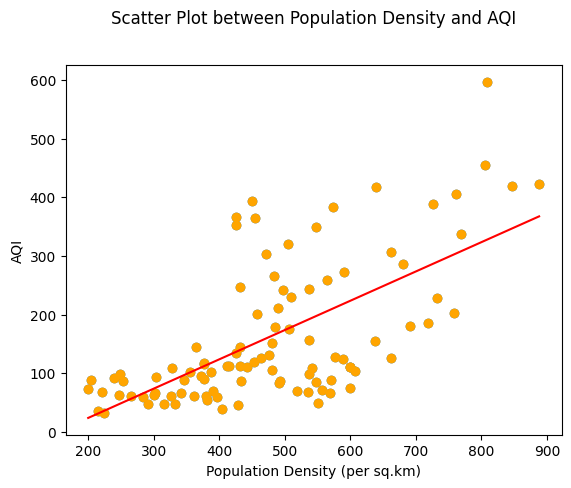

In [209]:
x,y = AQI['Population_Density'].values, AQI['AQI'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y)
plt.scatter(x,y,color='orange')
plt.xlabel("Population Density (per sq.km)")
plt.ylabel("AQI")
plt.title("Scatter Plot between Population Density and AQI",pad=30)
plt.show()

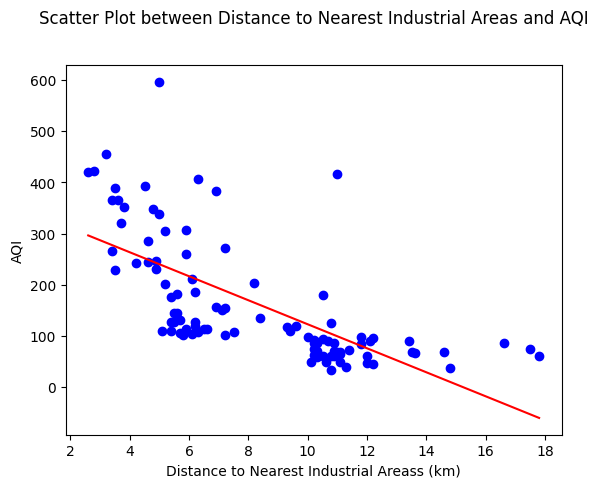

In [210]:
x,y = AQI['Proximity_to_Industrial_Areas'].values, AQI['AQI'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y,color='blue')
plt.xlabel("Distance to Nearest Industrial Areas (km)")
plt.ylabel("AQI")
plt.title("Scatter Plot between Distance to Nearest Industrial Areas and AQI",pad=30)
plt.show()

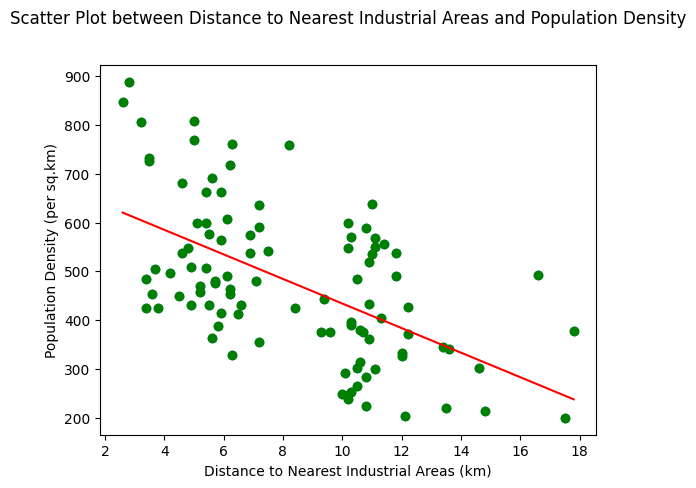

In [213]:
x,y = AQI['Proximity_to_Industrial_Areas'].values, AQI['Population_Density'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.scatter(x,y)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y,color='green')
plt.xlabel("Distance to Nearest Industrial Areas (km)")
plt.ylabel("Population Density (per sq.km)")
plt.title("Scatter Plot between Distance to Nearest Industrial Areas and Population Density",pad=30)
plt.show()

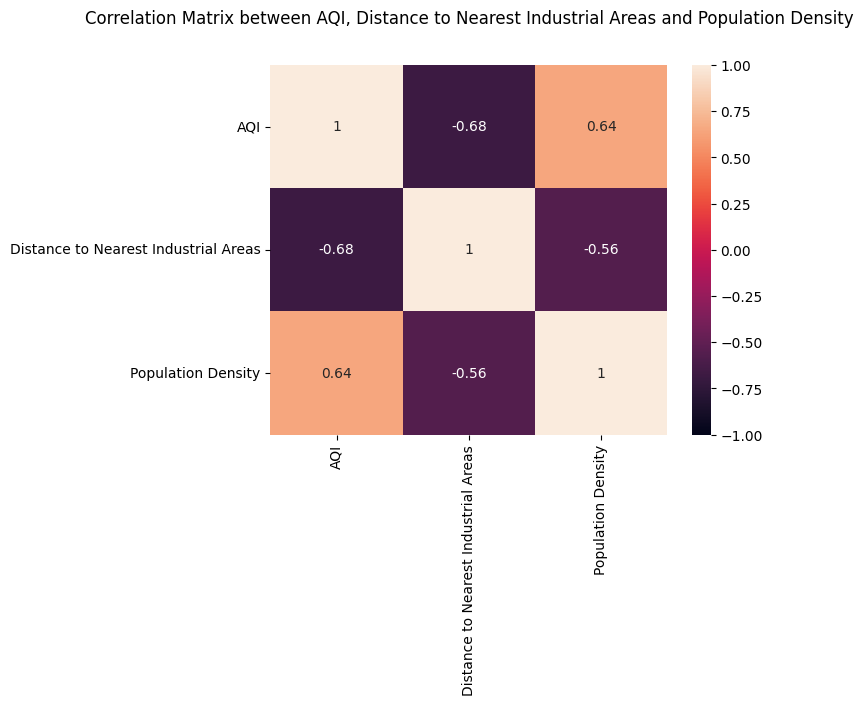

In [207]:
correlation = AQI[['AQI','Proximity_to_Industrial_Areas','Population_Density']].corr()

axis_corr = sns.heatmap(correlation, vmin=-1.0, vmax=1.0, annot=True, xticklabels=['AQI','Distance to Nearest Industrial Areas','Population Density'], yticklabels=['AQI','Distance to Nearest Industrial Areas','Population Density'])

plt.title("Correlation Matrix between AQI, Distance to Nearest Industrial Areas and Population Density", pad=30)
plt.show()